<html>
<h1 style="text-align:center; color:rgb(153, 99, 0)">EXPLORING PATTERNS AND TRENDS<br> IN EVERYDAY RECIPES</h1>
<h2 style="text-align:center; color:rgb(153, 99, 0)">SENG 474 – DATA MINING</h2>
<br>
<p style="text-align:center; font-size:14pt; font-style:italics">November 30, 2018</p>
<br>

<div style="height: auto; width: 200px; text-align:right">
<h5 style="text-align: left"><b>Prepared For:</b></h5>
Alex Thomo<br>
<h5 style="text-align: left"><b>By:</b></h5>
Abdulla Almahmood()<br>
Max Gunton (V00511318)<br>
Yaxi Yu(V00828218)<br>
</div>
</html>

<span style="font-size:1.4em;text-decoration:underline;color:orange">**Introduction**</span>
<p>As long as there has been life on earth there has been food, and no other animal has quite mastered the art of combining and preparing food quite as much as humans.  </p>
<p>Scientists generally agree that our early ancestors, Homo erectus, first appeared in Africa 1–2 million years ago. They spread throughout the world and evolved into ancient humans, and approximately 250,000 years ago: hearths appeared.  This is by most accounts the accepted archeological estimate for invention of cooking.  </p>
<p>Knowing that cooking and development of recipes has been on going for 250,000 years we figured there must be hidden patterns yet to be discovered in the ingredients and the cooking techniques used.  </p>


<span style="color:orange; font-size:1.4em; text-decoration:underline">**1.0 Data Collection**</span>
<h4 style="color:orange">You are only as good as your data!  And our data was …. Ok.  </h4>
<p>Initially we had hoped to collect and process our own data, but we were all quite busy this semester.  Therefore, we decided that in order to get the most out of applying the algorithms and techniques we learned, we would simply use an already existing dataset.  </p>
<p>The dataset we chose to use was uploaded to Kaggle.com and can be found using the following link:</p>
	&nbsp;<a href="https://www.kaggle.com/hugodarwood/epirecipes#full_format_recipes.json">https://www.kaggle.com/hugodarwood/epirecipes#full_format_recipes.json</a>
<p>The data comes in the form of a 26.7 CSV file and is composed of 20052 rows and 680 columns.  Each row represents a recipe structured as follows:</p>
<p>title | rating | calories | protein	fat	sodium | … | "characteristics & ingredients" </p>

<p>Where the first 6 row provide information about each recipe and the following 674 rows contain a 0 or a 1 depending on whether they contain the corresponding ingredient or satisfy the characteristic.  </p>

<h3 style="color:orange">1.1 Pitfalls of Our Dataset</h3>

<h4 style="color:orange">Overly Simplified</h4>
<p>One of the major downsides of using this provided dataset is that you can’t force anything out of it that isn’t already there.  For example, the presence of an ingredient is a good start when it comes to classifying recipes, but it is only part of the equation.  And we would be foolish to believe that the ratios of ingredients (their normalized weights) don’t also play a major part in finding patterns.  If we were collecting the data ourselves, we would have liked to include the weights of the ingredients instead of simply a 1 or 0.  </p>


<h4 style="color:orange">Flavour Molecule</h4>
<p>Given more time, we would have also liked to have added information about the composition of the ingredients themselves.  More specifically, the composition of flavour molecules that make up each ingredient.  We believe that this is the direction that would result in the most interesting results.  Using these we could compute the Cosine similarity between ingredients which would allow us to offer recommendation for food pairings.  As well as discover which flavor molecules go well with others.  However, gathering the data and structuring it proved to be too time consuming for the scope of this project.  It would also have added a level of complexity that may have been more than we could handle as beginners to data mining.  </p>

<h3 style="color:orange">1.2 Benefits of Our Dataset</h3>
<p>Some of the positive things about the dataset we are using is that it contains many attributes/columns, and this means that there are many potential relationships to be discovered.  In addition, the data came ready to go for frequent item set analysis, which allowed us to focus on implementing and optimizing the algorithm, rather than playing around with the data.  </p>
<p>Our dataset is also large, and this meant that we had to keep in mind efficiency as well as implement things in such a way that they could be generalized.  It also gave us a taste of how things go in industry, when you can’t see all your data at once.  This really drove the importance of using the visualization tools in the matplotlib library.  And although we were able to load our entire dataset into excel, it was on the upper limit of what excel could handle.  This meant that any data preprocessing had to be done using Python, and in a generalized way as it wasn’t feasible to do it by hand.  </p>


<span style="color:orange; font-size:1.4em; text-decoration:underline">**2.0 Data Preprocessing**</span>

The preprocessing process aims to clean and transform the raw data to an useful form. In
order to do that, we follow the next steps:  
2.1. Deal with missing values  
2.2. Data normalization  
2.3. Data visualization  
2.4. Training and Testing data set generation: To generate the files required for the
data mining process (i.e, ARFF files for the WEKA tool)  


In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('Structured Data/epi_r.csv', low_memory=False)

<span style="color:orange">**2.1. Deal With Missing Values.**</span>

In this section, we will look at how we can identify and mark values as missing.  
We can use plots and summary statistics to help identify missing or corrupt data.  
We can load the dataset as a Pandas DataFrame and print summary statistics on each attribute.

In [25]:
print(data.describe())

             rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

Now if we chain a .sum() method on the dataframe, we can see which column contain missing values:

In [26]:
data.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

Let's list all the column names which contain missing values

In [27]:
data.columns[data.isnull().any()].tolist()

['calories', 'protein', 'fat', 'sodium']

The simplest strategy for handling missing data is to remove records that contain a missing value.  
We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.  
Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:  

In [28]:
data.dropna(inplace=True)

Check again to see if we still have missing values:

In [29]:
data.columns[data.isnull().any()].tolist()

[]

All set!

<span style="color:orange">**2.2. Data normalization.**</span>

In [30]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


as we can see, the 1st column stores the name of each recipe;  
the column 2 to 6 store the generational info of each recipe;  
and the rest store the ingredients respectively (the value of these columns are eigher 0 or 1, showing whether each ingredient exist in this recipe or not).   

We want to normalize the data in the 2nd to the 6th columns.

In [31]:
data_general_info = data[['rating', 'calories', 'protein', 'fat', 'sodium']]
data_general_info.head()

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,7.0,559.0
1,4.375,403.0,18.0,23.0,1439.0
2,3.750,165.0,6.0,7.0,165.0
4,3.125,547.0,20.0,32.0,452.0
5,4.375,948.0,19.0,79.0,1042.0


Construct a method to normalize the data

In [32]:
def normalize(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

Call this method to normalze these columns

In [33]:
data_general_info_normalized = data_general_info.apply(normalize)
data_general_info_normalized.head()

,rating,calories,protein,fat,sodium
0,0.500,0.000014,0.000127,0.000004,0.000020
1,0.875,0.000013,0.000076,0.000013,0.000052
2,0.750,0.000005,0.000025,0.000004,0.000006
4,0.625,0.000018,0.000085,0.000019,0.000016
5,0.875,0.000031,0.000080,0.000046,0.000038


<span style="color:orange">**2.3. Data Visualization.**</span>

We can use seaborn (a Python data visualization library based on matplotlib) to visualize the data.

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

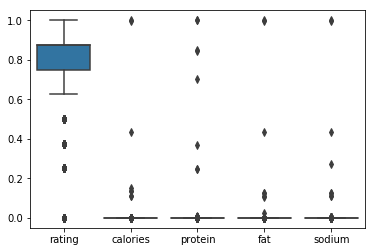

In [35]:
sns.boxplot(data = data_general_info_normalized)
plt.show()

A violin plot is similar to a box plot with a rotated kernel density plot on each side.  
Use Violin Plot to visualise the distribution of the data and its probability density.

C:\Users\OVRS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


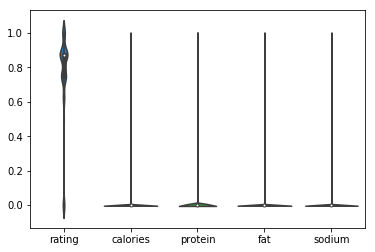

In [36]:
sns.violinplot(data=data_general_info_normalized)

plt.show()

<span style="color:orange; font-size:1.4em">**2.4 Training and Testing data set generation**</span>
We decided to implement the training / testing split using K-Fold cross validation.  

In [ ]:
# crossValidator.py

import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
#from confidenceInterval import confidenceInterval

# Linear Classifiers
from sklearn.linear_model import LogisticRegression, LinearRegression

# Decision Tree Classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB

CLASS_LABEL = 'rating'
NUM_CLASSES = 6
NUM_SPLITS = 10

#df = pd.read_csv('Structured Data/epi_r.csv')  # read in entire dataset
#df.fillna(-1, inplace=True)    # replace NaN values with -1
df = data

# split data into attributes and class labels
y = df[CLASS_LABEL]
X = df[[col for col in df.columns if col != CLASS_LABEL]]

# convert y to a numpy array
y = np.array(y)
y.reshape((-1,))

# change y from being continuous values between 0-5 to simply being an integer number
# 0, 1, 2, 3, 4, or 5
y = pd.cut(y,NUM_CLASSES, right=False, labels=[i for i in range(NUM_CLASSES)])

# print(y)
# print(X.columns[1])
strat_k_fold = StratifiedKFold(n_splits=NUM_SPLITS)  # parameters n_folds=10, shuffle=False, random_state=None

# Here we want to cast X and y as numpy arrays
X = np.array(X)
y = np.array(y)

# want to find the class that occurs the least often and only take that many instances
# from each class value so that we end up with an even distribution
minimum = np.min([len([val for val in y if val == i]) for i in range(6)])

classes = np.array([],dtype=np.int32).reshape(-1,)
for i in range(NUM_CLASSES):
    classes = np.append(classes,np.array((np.where(y == i)),dtype=np.int32).reshape(-1,)[:minimum])

X = X[classes] # extract our subset from entire dataset
y = y[classes] #              "

X = X[:, 1:]  # remove the title column from the dataset since these are unique to each entry anyway

splits = strat_k_fold.split(X, y)
#scores = np.array([], dtype=np.float32).reshape(-1,)
count = 1
for train_index, test_index in splits:
    # print('Train Index: {}'.format(train_index))
    # print('Test Index: {}'.format(test_index))
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    # TODO: use a grid search to determine the best learning constant
    #       tweek C and max iterations to get good convergence and speed mix
    log_reg_m = LogisticRegression(solver='lbfgs', C=0.1, max_iter=50000, multi_class='multinomial') #max_iter=50000
    lin_reg_m = LinearRegression()
    dtr_m = DecisionTreeRegressor()
    rfr_m = RandomForestRegressor(n_estimators=100)
    nb_m = BernoulliNB()

    log_reg_m.fit(X_train, y_train)
    lin_reg_m.fit(X_train, y_train)
    dtr_m.fit(X_train, y_train)
    rfr_m.fit(X_train, y_train)
    nb_m.fit(X_train, y_train)


    # print(log_reg_m.score(X_train,y_train))  # validating on test data

    y1 = log_reg_m.predict(X_test) # this one works well not to sure about the others
    y2 = lin_reg_m.predict(X_test)
    y3 = dtr_m.predict(X_test)
    y4 = rfr_m.predict(X_test)
    y5 = nb_m.predict(X_test)

    # try taking an average and choosing the closest
    #prediction = (y1 + y2 + y3 + y4 + y5) / 5
    #prediction = np.around(prediction)
    prediction = y1
    c1 = confidenceInterval()
    c1.establish(prediction, y_test, 80) # want to know with 80% confidence
    print('\nFOLD -  {}\n'.format(count))
    c1.printConfidence()
    count += 1

    # TODO: try voting based on majority
    # prediction = np.column_stack((y1,y2,y3,y4))

#print(scores.sum()/strat_k_fold.n_splits)




<span style="color:orange">**3. Data Mining.**</span>

Below takes in the predictions as an array and the correct classifications and uses the two to return the confidence interval

In [37]:
# confidenceInterval.py

import numpy as np

# TODO: expand evaluator to handle continuous class labels

# class_labels must be discrete and not continuous and numerical

class confidenceInterval:
    CLT_PROB_DIST = {0.1 : 3.09,    # 99.8% confidence
                 0.5 : 2.58,     # 99%     "
                 1.0 : 2.33,    # 98%      "
                 5.0 : 1.65,    # 90%      "
                 10.0 : 1.28,   # 80%      "
                 20.0 : 0.84,   # 60%      "
                 40.0 : 0.25}   # 20%      "
    MAX_SPREAD = 100
    p = None
    q = None
    variance = None
    SN = None
    N = None
    confidence = None
    
    
    def __init__(self, predictions=None, class_labels=None):
        pass

    def quantizeConfidence(self, confidence):
        index = (100 - confidence)/2.0
        values = np.array([0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 40.0])
        diffs = abs(values - index)
        index = values[np.argmin(diffs)]
        return (100 - (2*index)) , index

    
    def establish(self, predictions, class_labels, confidence=90):
        
        assert (len(predictions) == len(class_labels))

        self.confidence, index = self.quantizeConfidence(confidence)
        self.N = len(predictions)

        # ensure that the input arrays are of type numpy.array
        predictions = np.array(predictions)     # predictions.shape = (N,)
        class_labels = np.array(class_labels)   # class_labels.shape = (N,)

        # check to make sure they are the same shape
        assert (predictions.shape == class_labels.shape)

        # compare each array element wise to see if they are the same
        # given multiple class values if they are represented using integers
        # the predictions can be subtracted from the actual class_labels and
        # resulting zeros will indicate a successful predictions; anything else will
        # indicate an error or incorrect prediction

        results = class_labels - predictions
        #print(results)  # prints correctly
        #print(self.N)  # prints 32
        
        self.p = float(len([result for result in results if result == 0]))/float(self.N)
        self.q = 1-self.p
        self.variance = self.p*self.q/self.N
        denom = np.sqrt(self.variance)

        self.SN = [(self.p - self.CLT_PROB_DIST[index]*denom),
                   (self.p + self.CLT_PROB_DIST[index]*denom)]

        return
        
   
    def printConfidence(self):
        if self.SN != None:
            # \U+03F5 unicode for within the set
            print('Successes: {}\nErrors: {}\n___________\nTotal Instances: {}\n\nP: {}\nQ: {}\nVariance:'
                  ' {}\n'.format(self.p*self.N, self.q*self.N, self.N, self.p, self.q, self.variance))
            print('With {}% confidence probability of correct classification is in the '
                  'range {:.1f}% - {:.1f}%\n\n'.format(self.confidence,self.SN[0]*100,
                                                   self.SN[1]*100))
        else:
            print('Confidence not yet established\n\n')
        return

Below is an implementation of a cross validator.  Will add a more in depth description about this


FOLD -  1

Successes: 12.0
Errors: 42.0
___________
Total Instances: 54

P: 0.2222222222222222
Q: 0.7777777777777778
Variance: 0.003200731595793324

With 80.0% confidence probability of correct classification is in the range 15.0% - 29.5%



FOLD -  2

Successes: 7.0
Errors: 41.0
___________
Total Instances: 48

P: 0.14583333333333334
Q: 0.8541666666666666
Variance: 0.0025951244212962963

With 80.0% confidence probability of correct classification is in the range 8.1% - 21.1%



FOLD -  3

Successes: 17.0
Errors: 30.999999999999996
___________
Total Instances: 48

P: 0.3541666666666667
Q: 0.6458333333333333
Variance: 0.0047652633101851844

With 80.0% confidence probability of correct classification is in the range 26.6% - 44.3%



FOLD -  4

Successes: 16.0
Errors: 32.0
___________
Total Instances: 48

P: 0.3333333333333333
Q: 0.6666666666666667
Variance: 0.00462962962962963

With 80.0% confidence probability of correct classification is in the range 24.6% - 42.0%



FOLD -  5

Succes

In [39]:
# ROC_curve.py

import cv2

class ROC_curve:

    SCALE = 4000
    y = None
    predictions = None

    def __init__(self, predictions, y):
        self.y = (np.array(y, dtype=np.int32)).reshape((-1,))
        self.predictions = (np.array(predictions, dtype=np.int32)).reshape((-1,))
        assert (y.shape == predictions.shape)

    def compare_labels(self, axis):
        # 0 - TP
        # 1 - TN
        # 2 - FP
        # 3 - FN
        diff = axis[0] - axis[1]
        if diff == 0:
            if axis[0] == 1:
                # True Positive
                return 0
            else:
                # True Negative
                return 1
        else:
            if axis[0] == 0:
                # False Positive
                return 2
            else:
                # False Negative
                return 3

    def calcPoint(self):

        # y = y.reshape((-1,))
        # predictions = predictions.reshape((-1,))
        values = np.column_stack((self.y, self.predictions))


        # print(y)
        # print(predictions)

        a = np.apply_along_axis(self.compare_labels,1,values)
        labels, counts = np.unique(a, return_counts=True)
        labels2, counts2 = np.unique(self.y, return_counts=True)
        # print(a)
        # print(counts)
        # print(counts2)
        index = dict(zip(labels, counts))
        index2 = dict(zip(labels2, counts2))
        print(index2)
        confusion_matrix = {'TruePos' : index.get(0,0),
                            'TrueNeg' : index.get(1,0),
                            'FalsePos' : index.get(2,0),
                            'FalseNeg' : index.get(3,0),
                            'Positives' : index2.get(1,0),
                            'Negatives' : index2.get(0,0)
                            }

        true_positive_rate = confusion_matrix['TruePos'] / confusion_matrix['Positives']
        false_positive_rate = confusion_matrix['FalsePos'] / confusion_matrix['Negatives']

        graph_point = np.array([np.round(false_positive_rate,2)*self.SCALE,np.round(true_positive_rate,2)*self.SCALE], dtype=np.int32)
        return graph_point

    # assumes a 50 / 50 distribution between two class values as a baseline
    def displayROC(self, points):

        canvas = np.ones((self.SCALE+1,self.SCALE+1,3), dtype=np.int32) * 255
        #canvas[self.SCALE-graph_point[1], graph_point[0]] = 1
        #canvas[100-10,10] = 1
        plt.xticks(([_tick for _tick in range(0,self.SCALE,np.int32(np.round(self.SCALE/10)))]+[self.SCALE-1]),
                   ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])
        plt.yticks(([_tick for _tick in range(0,self.SCALE,np.int32(np.round(self.SCALE/10)))]+[self.SCALE-1]),
                   ['1.0', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1', '0'])

        cv2.line(canvas,(0,self.SCALE),(self.SCALE,0), (255,0,0), thickness=20)

        for i in points:
            cv2.circle(canvas,(self.SCALE - i[1], i[0]), 30, (0,0,0), -1, lineType=cv2.LINE_AA)

        plt.imshow(canvas)
        plt.show()

        # print(values)

In [41]:
# FrequentItemSets.py

import numpy as np
import pandas as pd

class FrequentItemSet:

    SUPPORT = 100  # should maybe call this MIN_SUPPORT
    DB = None
    CONFIDENCE = 0.1
    INTEREST = 1


    def __init__(self, db, support, confidence):
        self.DB = db
        self.SUPPORT = support
        self.CONFIDENCE = confidence

    def checkAxis(self,array):
        for i in array:
            if i == 0:
                return 0
        return 1

    def createPotentialSets(self, k, fis):
        new_fis = []
        #k = 3  # for testing
        if k == 1:
            potential_fis = [[i] for i in sorted(list(self.DB))]
        else:
            potential_fis = []
            previous_sets = fis[-1]  # assuming we have run this previously already for frequent itemsets of size k-1
            #print(previous_sets)
            #print(len(previous_sets))
            #previous_sets = [['A','B'],['A','C'],['C','D']]
            #print(previous_sets)
            for i in range(len(previous_sets)):
                for j in previous_sets[(i+1):]:
                    #print('{} - {}'.format(previous_sets[i], j))
                    if previous_sets[i][:-1] == j[:-1]:
                        potential_fis.append((previous_sets[i]+[j[-1]]))
                    else:
                        pass

        # print(potential_fis)
        # need to validate the potential FIS by counting their support in the database

        #potential_fis = [['fall']]
        #print(potential_fis)
        print('\nK = {}'.format(k))
        print('Pruning Step:   Start - {} potential sets'.format(len(potential_fis)))

        # this is the pruning step to make sure that all itemsets are indeed frequent
        for i in potential_fis:
            # print(i)  # prints the potential frequent item set
            item_set = self.DB[i]
            length = len(i)
            #print(length)
            temp = np.sum(item_set, axis=1)
            #new = np.array(temp).reshape(-1,)
            support = np.array(np.where(temp == length)).size

            # Below works but is really slow
            # support = np.sum(np.apply_along_axis(self.checkAxis, 1, item_set))
            if support >= self.SUPPORT:
                new_fis.append(i)
            #print(support)
            #break
        print('Pruning Step:   Complete - {} sets remaining'.format(len(new_fis)))
        #print(new_fis)
        return new_fis

        #

    def generateFIS(self):
        k = 2
        fis = []
        current_fis = self.createPotentialSets(1, fis)
        fis.append(current_fis)
        #print('k: 1  length: {}'.format(len(current_fis)))
        while len(current_fis) > 0:
            current_fis = []
            current_fis = self.createPotentialSets(k, fis)
            k += 1
            if len(current_fis) > 0:
                fis.append(current_fis)
            #break # remove after development
            #print('k: {}  length: {}'.format(k, len(current_fis)))

        return fis

    def generateClosedSets(self, all_sets):
        closed = {}
        all_sets.reverse()
        for i in range(len(all_sets)):
            for j in all_sets[i]:
                add = True
                if i == 0:
                    item_set = self.DB[j]
                    length = len(j)
                    # print(length)
                    temp = np.sum(item_set, axis=1)
                    # new = np.array(temp).reshape(-1,)
                    support = np.array(np.where(temp == length)).size
                    closed[frozenset(j)] = support
                else:
                    item_set = self.DB[j]
                    length = len(j)
                    # print(length)
                    temp = np.sum(item_set, axis=1)
                    # new = np.array(temp).reshape(-1,)
                    support = np.array(np.where(temp == length)).size
                    for k in all_sets[i-1]:
                        if set(j).issubset(set(k)):
                            # compute support for k
                            item_set2 = self.DB[k]
                            length2 = len(k)
                            # print(length)
                            temp2 = np.sum(item_set2, axis=1)
                            # new = np.array(temp).reshape(-1,)
                            support2 = np.array(np.where(temp2 == length2)).size

                            if support2 >= support:
                                add = False
                                break
                            else:
                                pass
                    if add:
                        closed[frozenset(j)] = support
        return closed

    def deriveInterest(self, fis):
        rules = []
        rules2 = []
        rules3 = []
        all_length = len(self.DB[:])
        for i in fis:
            entry = list(i)
            temp = entry.copy()
            for j in entry:
                prob_y = np.sum(self.DB[j]) / all_length
                prob_entry = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
                temp.remove(j)
                prob_x = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
                confidence = prob_entry / prob_x
                # print(confidence)
                if (prob_y < confidence) and (confidence >= self.CONFIDENCE):  # filters all of the trivial rules
                    interest = prob_entry/(prob_x * prob_y)
                    if interest > 1:
                        rules.append('{} --> {} : interest={:05.3f}     confidence={:05.4f}'.format(temp, [j],
                                                                                             interest, confidence))
                        rules2.append([temp,[j]])
                        
        # The following works, but is inefficient and takes too long to finish when minimum support is low
        # this loop merges appropriate rules to create longer ones
        # for i in range(len(rules2)):
        #     for j in rules2[i:]:
        #         if len(set(j[1]) & set(rules2[i][1])) != len(j[1]):
        #             entry = list(set(rules2[i][0] + j[0] + rules2[i][1] + j[1]))
        #             temp = entry.copy()
        #             prob_entry = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
        #             temp.remove(j[1][0])
        #             temp.remove(rules2[i][1][0])
        #             if len(temp) != 0:
        #                 y = list(set(rules2[i][1] + j[1]))
        #                 prob_x = np.array(np.where(np.sum(self.DB[temp], axis=1) == len(temp))).size / all_length
        #                 prob_y = np.array(np.where(np.sum(self.DB[y], axis=1) == len(y))).size / all_length
        #                 confidence = prob_entry / prob_x
        #                 #print(confidence)
        #                 #print(prob_y)
        #                 if (prob_y <= confidence) and (
        #                         confidence >= self.CONFIDENCE):  # filters all of the trivial rules
        #                     try:
        #                         interest = prob_entry / (prob_x * prob_y)
        #                     except ZeroDivisionError:
        #                         interest = 0
        #                     #print(interest)
        #                     if interest > 1:  # change back to 1
        #                         rules.append('{} --> {} : interest={:05.3f}     confidence={:05.4f}'.format(temp, y,
        #                                                                                                     interest,
        #                                                                                                     confidence))
        #                         rules3.append([temp, j])
        #     if i == (len(rules2) - 1):
        #         rules2 = rules3.copy()




        return rules



    def getSupport(self):
        return self.SUPPORT

    def getFIS(self):
        return self.FIS

def main():

    min_support = 20  # ran with value 10
    min_confidence = 0.5
    min_interest = 1.0
    df = pd.read_csv('Structured Data/epi_r.csv')  # read in data

    # PREPROCESSING STAGE ---------------------------------------------------------------

    df = df.drop(['title', 'rating', 'calories', 'protein', 'fat', 'sodium'], axis=1)

    # After running once decided to drop these as they seemed to lead to uninteresting results.
    # They alos had quite a high occurences which leads to explosions in complexity when looking for frequent item sets
    # with smaller support values.  Also many are generalization of much more specific information also included
    # therefore many times they lead to redundant information
    df = df.drop(
        ['bon appétit', 'kosher', 'peanut free', 'pescatarian', 'side', 'soy free', 'tree nut free', 'vegetarian',
         'wheat/gluten-free', 'no sugar added', 'dairy free', 'vegan', 'quick & easy', 'gourmet', 'bake',
         'kidney friendly', 'fruit', 'vegetable', 'dessert', 'alcoholic','backyard bbq', 'fourth of july', 'grill',
         'grill/barbecue', 'summer', 'healthy', 'dinner', 'appetizer', 'chill', 'christmas', 'cocktail party', 'drink',
         'fall', 'herb', 'high fiber', 'kid-friendly', 'lemon', 'low cal', 'lunch', 'no-cook', 'roast', 'salad',
         'sauce', 'sauté', 'soup/stew', 'spring', 'sugar conscious', 'thanksgiving', 'winter', 'brunch', 'breakfast',
         'berry', 'nut', 'bon app��tit'], axis=1)
    # df = df.drop(
    #     ['bon appétit', 'kosher', 'peanut free', 'pescatarian', 'side', 'soy free', 'tree nut free', 'vegetarian',
    #      'wheat/gluten-free', 'no sugar added', 'dairy free', 'vegan', 'quick & easy', 'gourmet', 'bake',
    #      'kidney friendly', 'fruit', 'vegetable', 'dessert', 'alcoholic','backyard bbq', 'fourth of july', 'grill',
    #      'grill/barbecue', 'summer', 'healthy', 'dinner', 'appetizer', 'chill', 'christmas', 'cocktail party', 'drink',
    #      'fall', 'herb', 'high fiber', 'kid-friendly', 'lemon', 'low cal', 'lunch', 'no-cook', 'roast', 'salad',
    #      'sauce', 'sauté', 'soup/stew', 'spring', 'sugar conscious', 'thanksgiving', 'winter', 'brunch', 'breakfast',
    #      'berry', 'nut'], axis=1)
    df = df.to_sparse(fill_value=0)
    fis = FrequentItemSet(df,min_support,min_confidence)
    #fis.generateFIS()
    print('FREQUENT ITEM SET ANALYSIS')
    print('Items: {}'.format(np.array(df[:]).shape[1]))
    print('Rows: {}'.format(np.array(df[:]).shape[0]))
    print('Min Support: {}'.format(min_support))
    print('Min Confidence: {}'.format(min_confidence))
    print('Min Interestingness: {}'.format(min_interest))
    all_item_sets = fis.generateFIS()
    count = np.sum(np.array([len(i) for i in all_item_sets]))
    print('\nGenerated {} Frequent Item Sets'.format(count))
    closed_item_sets = fis.generateClosedSets(all_item_sets)
    print('\nCLOSED ITEM SETS:')
    print('Number of sets: {}\n'.format(len(closed_item_sets)))
    for i in closed_item_sets:
        print('{}\t-\t{}'.format(list(i),closed_item_sets[i]))

    #want to derive interestingness from the data


    interesting_rules = fis.deriveInterest(closed_item_sets)
    print('\nRULES:')
    print('Number of rules: {}\n'.format(len(interesting_rules)))
    for i in interesting_rules:
        print(i)



main()

FREQUENT ITEM SET ANALYSIS
Items: 620
Rows: 20052
Min Support: 20
Min Confidence: 0.5
Min Interestingness: 1.0

K = 1
Pruning Step:   Start - 620 potential sets
Pruning Step:   Complete - 392 sets remaining

K = 2
Pruning Step:   Start - 76636 potential sets
Pruning Step:   Complete - 2654 sets remaining

K = 3
Pruning Step:   Start - 39665 potential sets
Pruning Step:   Complete - 432 sets remaining

K = 4
Pruning Step:   Start - 407 potential sets
Pruning Step:   Complete - 16 sets remaining

K = 5
Pruning Step:   Start - 2 potential sets
Pruning Step:   Complete - 1 sets remaining

K = 6
Pruning Step:   Start - 0 potential sets
Pruning Step:   Complete - 0 sets remaining

Generated 3495 Frequent Item Sets

CLOSED ITEM SETS:
Number of sets: 3493

['frozen dessert', 'milk/cream', 'egg', 'ice cream machine', 'freeze/chill']	-	20
['chocolate', 'cake', 'egg', 'milk/cream']	-	25
['mixer', 'chocolate', 'cake', 'food processor']	-	23
['mixer', 'chocolate', 'cake', 'milk/cream']	-	25
['mixer

['condiment/spread', 'orange']	-	42
['paleo', 'condiment/spread']	-	39
['parsley', 'condiment/spread']	-	37
['party', 'condiment/spread']	-	30
['condiment/spread', 'pepper']	-	53
['picnic', 'condiment/spread']	-	27
['condiment/spread', 'pineapple']	-	20
['raisin', 'condiment/spread']	-	30
['salad dressing', 'condiment/spread']	-	30
['shallot', 'condiment/spread']	-	30
['condiment/spread', 'simmer']	-	39
['condiment/spread', 'sour cream']	-	47
['spice', 'condiment/spread']	-	32
['super bowl', 'condiment/spread']	-	40
['tomatillo', 'condiment/spread']	-	30
['tomato', 'condiment/spread']	-	114
['condiment/spread', 'vinegar']	-	94
['yogurt', 'condiment/spread']	-	69
['egg', 'cookie']	-	22
['cookies', 'dairy']	-	27
['edible gift', 'cookies']	-	26
['egg', 'cookies']	-	39
['cookies', 'food processor']	-	24
['ginger', 'cookies']	-	25
['hazelnut', 'cookies']	-	21
['mixer', 'cookies']	-	65
['cookies', 'oat']	-	24
['cookies', 'orange']	-	24
['cookies', 'party']	-	37
['cookies', 'pistachio']	-	23


['mixer', 'shower']	-	34
['mixer', 'simmer']	-	23
['mixer', 'sour cream']	-	50
['mixer', 'spice']	-	36
['mixer', 'strawberry']	-	22
['mixer', 'vanilla']	-	41
['mixer', 'walnut']	-	41
['mixer', 'wedding']	-	20
['monterey jack', 'tortillas']	-	24
["new year's day", "mother's day"]	-	20
['party', "mother's day"]	-	24
['shower', "mother's day"]	-	33
['olive', 'mozzarella']	-	20
['parmesan', 'mozzarella']	-	45
['pasta', 'mozzarella']	-	43
['ricotta', 'mozzarella']	-	20
['sandwich', 'mozzarella']	-	21
['tomato', 'mozzarella']	-	94
['mushroom', 'noodle']	-	28
['mushroom', 'onion']	-	143
['paleo', 'mushroom']	-	23
['mushroom', 'parmesan']	-	65
['mushroom', 'parsley']	-	29
['mushroom', 'pasta']	-	111
['mushroom', 'pea']	-	21
['mushroom', 'pepper']	-	33
['pork', 'mushroom']	-	43
['mushroom', 'potato']	-	52
['mushroom', 'potluck']	-	28
['poultry', 'mushroom']	-	41
['mushroom', 'red wine']	-	35
['rice', 'mushroom']	-	45
['mushroom', 'rosemary']	-	32
['sausage', 'mushroom']	-	20
['mushroom', 'self'


RULES:
Number of rules: 132

['milk/cream', 'egg', 'ice cream machine', 'freeze/chill'] --> ['frozen dessert'] : interest=45.315     confidence=0.8000
['egg', 'ice cream machine', 'freeze/chill'] --> ['milk/cream'] : interest=7.852     confidence=0.7812
['chocolate', 'cake', 'food processor'] --> ['mixer'] : interest=23.615     confidence=0.7419
['cake', 'egg', 'food processor'] --> ['mixer'] : interest=26.932     confidence=0.8462
['simmer', 'carrot', 'celery'] --> ['onion'] : interest=8.017     confidence=0.8947
['ice cream machine', 'dairy', 'freeze/chill'] --> ['frozen dessert'] : interest=36.652     confidence=0.6471
['ice cream machine', 'dairy', 'freeze/chill'] --> ['milk/cream'] : interest=6.504     confidence=0.6471
['dairy', 'milk/cream', 'ice cream machine'] --> ['frozen dessert'] : interest=42.483     confidence=0.7500
['ice cream machine'] --> ['milk/cream'] : interest=6.080     confidence=0.6049
['egg', 'ice cream machine', 'freeze/chill'] --> ['frozen dessert'] : intere